## Makeing a cool Project that is placement predictor with your iq and CGPA

### Steps
#### 0. Preprocess + EDA + Feature Selection
#### 1. Extract input and output cols
#### 3. Train test split
#### 4. Train the model
#### 5. Evaluate the model/model selection
#### 6. Deploy the model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('placement_data.csv')

In [ ]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [ ]:
# Checking duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df = df.iloc[ :,1:]

In [ ]:
df.shape

(100, 3)

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

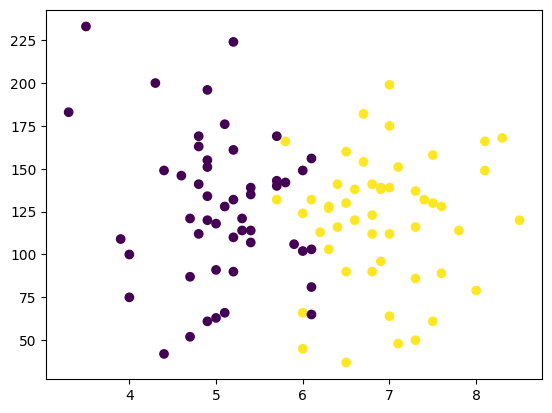

In [ ]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

## we are Going to Logistic regration which classify the data

In [ ]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
X.shape

(100, 2)

### Next step Train test split

In [ ]:
!pip3 install sklearn

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [1]:
# it randomy select any 10 random testing rows
from sklearn.model_selection import train_test_split
train_test_split(X,Y,test_size=0.1) # now here we are selection test size 10%

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1) # now here we are selection test size 10%


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X_train

,cgpa,iq
6,5.7,143.0
50,3.5,233.0
52,7.0,175.0
18,4.0,100.0
61,7.3,137.0
...,...,...
55,7.8,114.0
24,4.7,121.0
9,5.1,66.0
83,7.5,130.0


## Now we have to do scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[ 0.78788705,  0.43073595],
       [ 0.96672648,  1.28661388],
       [-0.91108755,  0.78315627],
       [-0.6428284 , -0.34962334],
       [ 0.87730677,  0.38039019],
       [ 1.23498563, -0.95377246],
       [ 0.5196279 ,  0.15383427],
       [-0.91108755,  1.81524437],
       [-0.6428284 , -0.85308094],
       [ 0.07252933, -1.98586055],
       [ 0.43020819,  0.43073595],
       [-0.91108755, -0.09789453],
       [-2.16296357,  2.74664093],
       [-0.19572982,  0.40556307],
       [ 0.87730677, -0.70204366],
       [-0.82166783, -0.82790806],
       [ 0.07252933,  0.00279699],
       [ 0.34078847, -0.5258335 ],
       [ 1.0561462 ,  0.68246475],
       [ 0.78788705, -0.02237589],
       [ 0.69846734,  0.75798339],
       [ 2.12918279,  1.11040372],
       [-0.82166783, -1.53274871],
       [ 1.23498563,  0.33004443],
       [ 0.16194904, -1.07963686],
       [ 0.07252933,  0.63211899],
       [-0.46398897,  0.38039019],
       [ 0.96672648, -0.29927758],
       [ 0.25136876,

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[-0.01689039, -0.45031486],
       [ 1.50324478, -0.87825382],
       [ 0.16194904,  0.20418003],
       [ 0.60904762, -0.09789453],
       [ 0.69846734,  1.46282404],
       [ 1.50324478,  0.10348851],
       [-1.71586499, -1.23067415],
       [ 0.5196279 ,  0.90902068],
       [ 1.95034336,  1.06005796],
       [ 1.23498563, -1.85999615]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

### this is Model training

In [ ]:
clf.fit(X_train,Y_train)

LogisticRegression()

### Next step is to evaluate the Model

In [ ]:
y_prict = clf.predict(X_test)

In [ ]:
Y_test

,placement
1,0
42,1
71,1
20,1
97,1
30,1
68,0
38,1
65,1
77,1


In [ ]:
from sklearn.metrics import accuracy_score

### It's calculating the accuracy

In [ ]:
accuracy_score(Y_test,y_prict)

1.0

### How to plot decision boudary what machine learning modal see in data how it created that model
* we will use a library  mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

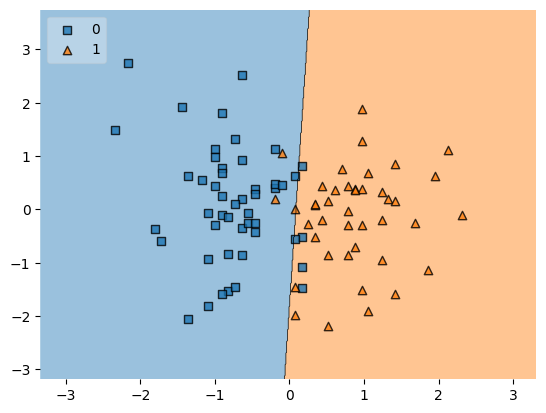

In [ ]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend = 2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))